In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('task_d.csv')
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [3]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values
data.corr()['target']

x            0.728290
y           -0.690684
z            0.969990
x*x          0.719570
2*y         -0.690684
2*z+3*x*x    0.764729
w            0.641750
target       1.000000
Name: target, dtype: float64

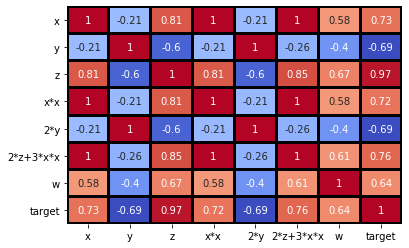

In [4]:
sns.heatmap(data.corr(),annot =True,cmap= 'coolwarm',linewidths=2, linecolor='black',cbar=False)
plt.show()

In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C= 0.1,random_state=15)
clf.fit(X=X, y=Y)
print(clf.intercept_)
print(clf.score(X=X,y=Y))
print(clf.coef_)

[0.05890239]
1.0
[[ 0.40816098 -0.51879248  0.78570391  0.38758667 -0.51879248  0.44369133
   0.34622324]]


In [6]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'C': [10**-4, 10**-2,10**-1,10**0, 10**2, 10**4]}]
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'accuracy', cv=5)
model.fit(X=X, y=Y)
print(model.best_estimator_)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [7]:
from sklearn.metrics import accuracy_score
best_model = LogisticRegression(C= 0.0001,random_state=15)
best_model.fit(X=X, y=Y)
Y_predict = best_model.predict(X)
print(accuracy_score(Y, Y_predict))
print(best_model.coef_)


1.0
[[ 0.00359629 -0.00341974  0.00479981  0.00355269 -0.00341974  0.00377694
   0.00316971]]


In [8]:
X1 = X
for i,j in enumerate(X):
    for k in range(len(j)):
          X1[i][k]+= 10**-2
tuned_parameters = [{'C': [10**-4, 10**-2,10**-1,10**0, 10**2, 10**4]}]
model1 = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'accuracy', cv=5)
model1.fit(X=X1, y=Y)
print(model1.best_estimator_)
print(model1.best_score_)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
1.0


In [9]:
best_model1 = LogisticRegression(C= 0.0001,random_state=15)
best_model1.fit(X=X1, y=Y)
Y_pred = best_model1.predict(X1)
print(accuracy_score(Y, Y_pred))
print(best_model1.coef_)

1.0
[[ 0.00359629 -0.00341974  0.00479981  0.00355268 -0.00341974  0.00377694
   0.00316971]]


In [51]:
w = best_model.coef_
w1 = best_model1.coef_
Diff_in_weights = abs(w-w1)
accuracy = accuracy_score(Y, Y_predict)
accuracy1 = accuracy_score(Y, Y_pred)
Diff_in_acc = accuracy - accuracy1
print(Diff_in_acc)
print(Diff_in_weights)
Percentage_diff = (abs(w-w1)/abs(w))*100
print(Percentage_diff)
dicti={}
b = list(data.columns)
b.pop(-1)
for i in range(len(b)):
    dicti.update({Percentage_diff[0][i]:b[i]})
a = sorted(dicti.keys(),reverse = True)
for i in range(4):
    print("top",i+1,"feature with most percentage in change in weights: ",dicti[a[i]])




0.0
[[2.96548494e-09 2.99278986e-09 3.00066848e-09 2.96272272e-09
  2.99278986e-09 2.96646388e-09 2.97706296e-09]]
[[8.24594669e-05 8.75152305e-05 6.25163888e-05 8.33938804e-05
  8.75152305e-05 7.85414224e-05 9.39222693e-05]]
top 1 feature with most percentage in change in weights:  w
top 2 feature with most percentage in change in weights:  2*y
top 3 feature with most percentage in change in weights:  x*x
top 4 feature with most percentage in change in weights:  x


# TASK 2

In [53]:
from sklearn import linear_model
clf = linear_model.SGDClassifier(eta0=0.001, alpha=0.001, loss='hinge', random_state=15, penalty='l2', tol=1e-3, verbose=False, learning_rate='constant')
clf.fit(X=X, y=Y)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='constant', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=15, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
tuned_parameters = [{'C': [10**-4, 10**-2,10**-1,10**0, 10**2, 10**4]}]
model = GridSearchCV(SVC(), tuned_parameters, scoring = 'accuracy', cv=5)
model.fit(X=X, y=Y)
print(model.best_estimator_)

SVC(C=0.0001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [61]:
from sklearn.metrics import accuracy_score
best_model = SVC(C= 0.0001,random_state=15,kernel ='linear')
best_model.fit(X=X, y=Y)
Y_predict = best_model.predict(X)
print(accuracy_score(Y, Y_predict))
print(best_model.coef_)

0.99
[[ 0.0072829  -0.00690684  0.0096999   0.0071957  -0.00690684  0.00764729
   0.0064175 ]]


In [62]:
X1 = X
for i,j in enumerate(X):
    for k in range(len(j)):
          X1[i][k]+= 10**-2
tuned_parameters = [{'C': [10**-4, 10**-2,10**-1,10**0, 10**2, 10**4]}]
model1 = GridSearchCV(SVC(), tuned_parameters, scoring = 'accuracy', cv=5)
model1.fit(X=X1, y=Y)
print(model1.best_estimator_)
print(model1.best_score_)

SVC(C=0.0001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
1.0


In [63]:
best_model1 = SVC(C= 0.0001,random_state=15,kernel ='linear')
best_model1.fit(X=X1, y=Y)
Y_pred = best_model1.predict(X1)
print(accuracy_score(Y, Y_pred))
print(best_model1.coef_)

0.99
[[ 0.0072829  -0.00690684  0.0096999   0.0071957  -0.00690684  0.00764729
   0.0064175 ]]


In [64]:
w = best_model.coef_
w1 = best_model1.coef_
Diff_in_weights = abs(w-w1)
accuracy = accuracy_score(Y, Y_predict)
accuracy1 = accuracy_score(Y, Y_pred)
Diff_in_acc = accuracy - accuracy1
print(Diff_in_acc)
print(Diff_in_weights)
Percentage_diff = (abs(w-w1)/abs(w))*100
print(Percentage_diff)
dicti={}
b = list(data.columns)
b.pop(-1)
for i in range(len(b)):
    dicti.update({Percentage_diff[0][i]:b[i]})
a = sorted(dicti.keys(),reverse = True)
for i in range(4):
    print("top",i+1,"feature with most percentage in change in weights: ",dicti[a[i]])



0.0
[[1.73472348e-18 8.67361738e-19 5.20417043e-18 1.73472348e-18
  8.67361738e-19 3.46944695e-18 0.00000000e+00]]
[[2.38191259e-14 1.25580050e-14 5.36517818e-14 2.41077812e-14
  1.25580050e-14 4.53683411e-14 0.00000000e+00]]
top 1 feature with most percentage in change in weights:  z
top 2 feature with most percentage in change in weights:  2*z+3*x*x
top 3 feature with most percentage in change in weights:  x*x
top 4 feature with most percentage in change in weights:  x
